In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None
#df = pd.read_csv("C:/Users/.../Oilanalysis.csv") #for those who would like to work from a local drive
df = pd.read_csv("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.csv", sep=";")

In [3]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [4]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [5]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

In [6]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

#dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
#dummy.corr(min_periods=15)
#plt.matshow(dummy.corr(min_periods=15))
#plt.show()
#print(dummy.columns)

#del dummy

In [7]:
# convert categorical variables into indicator functions

df = pd.get_dummies(df,columns=["Age"])
#df


In [8]:
# define the response variable and convert it into an np.array

y=np.array(df["Age_After 1 year"])


In [9]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier


In [10]:
# define the explanatory variables

X=df.iloc[:,:34]
X_names=df.iloc[:,:34].columns


In [11]:
# impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [16]:
# create a training set and a validation set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify=y)

#print('X_train Shape:', X_train.shape)
#print('y_train Shape:', y_train.shape)
#print('X_test Shape:', X_test.shape)
#print('Y_test Shape:', y_test.shape)


In [17]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 2000, random_state = 1)

# Train the model on training data

rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=2000, random_state=1)

In [18]:
# validate the random forest using the test set

predictions = rf.predict(X_test)


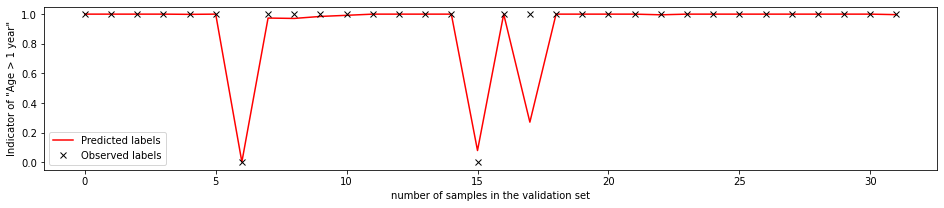

In [21]:
# plot the result of the validation

plt.figure(figsize=(16,3))
plt.plot(range(len(predictions)), predictions, '-', label="Predicted labels", color="red")
plt.plot(range(len(y_test)), y_test, 'x', label="Observed labels",color="black")
plt.xlabel('number of samples in the validation set')
plt.ylabel('Indicator of "Age > 1 year"')
plt.legend()
plt.show()


[Text(334.79999999999995, 453.0, 'CU <= 1.5\nmse = 0.059\nsamples = 59\nvalue = 0.938'),
 Text(223.2, 271.8, 'MG <= 8.5\nmse = 0.188\nsamples = 3\nvalue = 0.25'),
 Text(111.6, 90.59999999999997, 'mse = 0.0\nsamples = 1\nvalue = 1.0'),
 Text(334.79999999999995, 90.59999999999997, 'mse = 0.0\nsamples = 2\nvalue = 0.0'),
 Text(446.4, 271.8, 'mse = 0.0\nsamples = 56\nvalue = 1.0')]

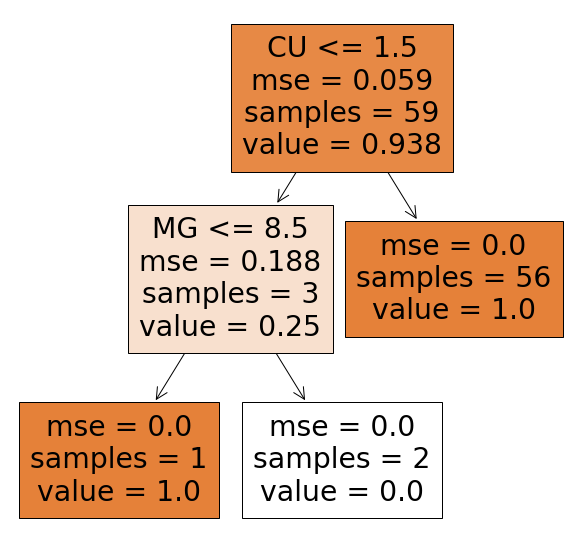

In [22]:
# depict a tree from the forest

plt.figure(figsize=(10,10))
clf = rf.estimators_[1]
tree.plot_tree(clf,feature_names=X_names, filled=True)


In [23]:
#plot the importance of the various explanatory variables

pd.DataFrame(rf.feature_importances_,index=X_names).sort_values(0,ascending=False)


,0
CU,0.809958
VIS99,0.024242
VIS40,0.021000
WATER,0.013833
VLAMCC,0.010249
ZN,0.009834
MG,0.009399
CA,0.008788
LNF-FW,0.008576
ISO 4406 large,0.008449
